<a href="https://colab.research.google.com/github/KLN-TBN/KLN-TBN/blob/main/Convolution_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CM20219 – Convolution Lab
This lab implements image convolution of greyscale images and is worth 3.3% of marks for the unit.

Convolution a basic image filtering operation that is implemented in:
* many computer vision systems (e.g. for edge detection),
* most image editing programs such as Photoshop (e.g. for image sharpening), and
* many deep learning systems, e.g. for convolutional neural networks (CNNs).

Let us start by preparing the notebook, and loading and preparing a test image.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy, scipy.misc, scipy.ndimage

In [ ]:
## Make figures larger
plt.rcParams['figure.figsize'] = [10, 6]

## Try commenting this out if plots look blurry on your screen.
# %config InlineBackend.figure_format = 'retina'

'image_int' has shape (512, 512) and datatype int64


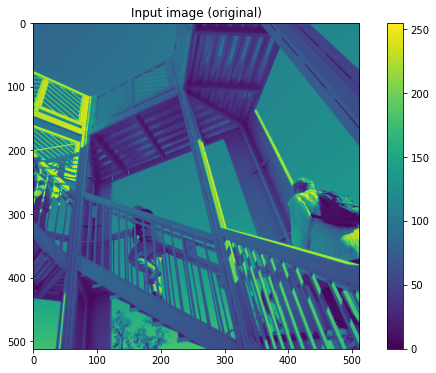

In [ ]:
## Load a built-in test image.
image_int = scipy.misc.ascent()
print(f"'image_int' has shape {image_int.shape} and datatype {image_int.dtype}")

## Display the input image.
## Note that Matplotlib by default uses a colour map for single-channel images.
## The colour map is illustrated using the colour bar on the right.
plt.imshow(image_int)
plt.title('Input image (original)')
plt.colorbar();  # The semicolon suppresses the return value of the function.

'image' has shape (512, 512) and datatype float64


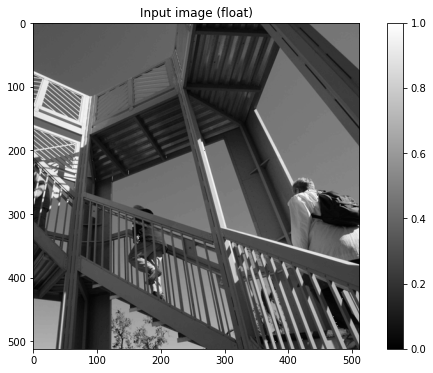

In [ ]:
## Convert the image from integer 0..255 to float 0..1 for easier processing.
image = image_int.astype('float') / 255
print(f"'image' has shape {image.shape} and datatype {image.dtype}")

## Here, we override the default colour map using 'gray[scale]',
## and set the range of displayed values to vmin..vmax = 0..1.
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.title('Input image (float)')
plt.colorbar();

'image_crop' has shape (100, 100) and datatype float64


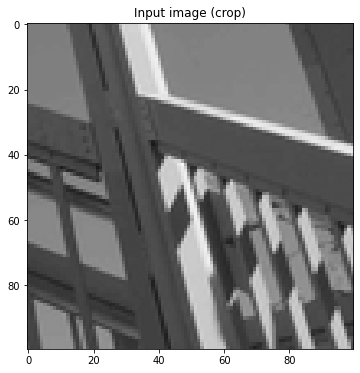

In [ ]:
## Lets us crop out a subimage as a test image.
image_crop = image[300:400, 260:360]
print(f"'image_crop' has shape {image_crop.shape} and datatype {image_crop.dtype}")

## Display the image.
plt.imshow(image_crop, cmap='gray', vmin=0, vmax=1)
plt.title('Input image (crop)');

----
## 1. Basic convolution [40 marks]

Implement basic convolution by translating the pseudo-code below to Python.

Fill in the `basic_convolution(image, kernel)` below, which takes as input a grayscale `image` (2D matrix) and a filtering `kernel` (2D matrix), and returns the convolved image result as a greyscale image with the same size and datatype as the input image.

This operation can be described by the following pseudocode:
```
for each image row in input image:
    for each pixel in image row:
        set accumulator to zero
        
        for each kernel row in kernel:
            for each element in kernel row:
                if element position <corresponding to> pixel position then
                    multiply element value <corresponding to> pixel value
                    add result to accumulator
                endif

        set output image pixel to accumulator
```
(`<corresponding to>` input image pixels are found relative to the kernel’s origin)

Source: https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution

In [ ]:
def basic_convolution(image, kernel, verbose=False):
  'Computes the convolution of an image with a kernel.'   
  flippedKernel = np.ones_like(kernel)
  if kernel.ndim == 1:
    for column in range(0,len(kernel)):
      flippedKernel[column] = kernel[len(kernel)-1-column]
  else:
    for row in range(0,len(kernel)):
      for column in range(0,len(kernel[0])):
        flippedKernel[row, column] = kernel[len(kernel)-1-row][len(kernel[0])-1-column]
  kernel = flippedKernel
  outputImage = np.ones_like(image)
  if kernel.ndim == 1:
    originColumn = (len(kernel)-1)//2
  else:
    originRowColumn = ((len(kernel)-1)//2,(len(kernel[0])-1)//2)
  for imageRow in range(0,len(image)):
    for pixel in range(0, len(image[imageRow])):
      accumulator = 0
      if kernel.ndim == 1:
        for element in range(0,len(kernel)):
          xOffset = originColumn - element
          if pixel-xOffset >= 0 and pixel-xOffset < len(image[0]):
            accumulator += kernel[element] * image[imageRow,pixel-xOffset]
      else:
        for kernelRow in range(0,len(kernel)):
          for element in range(0,len(kernel[0])):
            yOffset = originRowColumn[0] - kernelRow
            xOffset = originRowColumn[1] - element
            if imageRow-yOffset >= 0 and imageRow-yOffset < len(image) and pixel-xOffset >= 0 and pixel-xOffset < len(image[0]):
              accumulator += kernel[kernelRow,element] * image[imageRow-yOffset,pixel-xOffset]
      outputImage[imageRow, pixel] = accumulator
  return outputImage

"""
def basic_convolution(image, kernel, verbose=False):
  'Computes the convolution of an image with a kernel.'
  outputImage = np.ones_like(image)
  for imageRow in range(0,len(image)):
    for pixel in range(0, len(image[0])):
      accumulator = 0
      for kernelRow in range(0,len(kernel)):
        for element in range(0,len(kernel[0])):
          if imageRow+kernelRow < len(image) and pixel+element < len(image[0]):
            accumulator += kernel[kernelRow,element] * image[imageRow+kernelRow,pixel+element]
      outputImage[imageRow, pixel] = accumulator
  return outputImage
"""

"\ndef basic_convolution(image, kernel, verbose=False):\n  'Computes the convolution of an image with a kernel.'\n  outputImage = np.ones_like(image)\n  for imageRow in range(0,len(image)):\n    for pixel in range(0, len(image[0])):\n      accumulator = 0\n      for kernelRow in range(0,len(kernel)):\n        for element in range(0,len(kernel[0])):\n          if imageRow+kernelRow < len(image) and pixel+element < len(image[0]):\n            accumulator += kernel[kernelRow,element] * image[imageRow+kernelRow,pixel+element]\n      outputImage[imageRow, pixel] = accumulator\n  return outputImage\n"

### Test your result

Demonstrate the functionality of your function by running the following cell.
Does you result looked blurry?

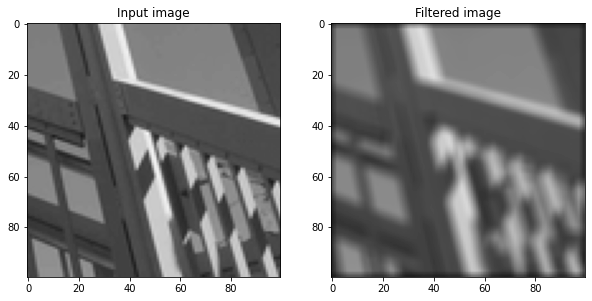

In [ ]:
## Prepare a small convolution kernel (good for basic convolution).
kernel = np.ones([5, 5])
kernel = kernel / kernel.sum()  # normalise kernel
#kernel = np.array([-1,0,1])

result1 = basic_convolution(image_crop, kernel)

## Display input image on the left.
plt.subplot(1, 2, 1); plt.title('Input image'); plt.imshow(image_crop, cmap='gray', vmin=0, vmax=1)

## Display filtered image on the right.
plt.subplot(1, 2, 2); plt.title('Filtered image'); plt.imshow(result1, cmap='gray', vmin=0, vmax=1);

----
## 2.	Border handling [20 marks]

Improve your implementation from the previous exercise:
1. Centre the filtered image, so that the content of the input and filtered images is not shifted between them; and
2. Fill in the border regions by extending/replicating the edge pixels of the image (‘clamp-to-edge’).

In [ ]:
def extended_convolution(image, kernel, verbose=False):
  'Computes the convolution of an image with a kernel, with clamp-to-edge.'
  #print(kernel)
  flippedKernel = np.ones_like(kernel)
  if kernel.ndim == 1:
    for column in range(0,len(kernel)):
      flippedKernel[column] = kernel[len(kernel)-1-column]
  else:
    for row in range(0,len(kernel)):
      for column in range(0,len(kernel[0])):
        flippedKernel[row, column] = kernel[len(kernel)-1-row][len(kernel[0])-1-column]
  kernel = flippedKernel
  #print(kernel)
  outputImage = np.zeros_like(image)
  for imageRow in range(0,len(image)):
    for pixel in range(0, len(image[0])):
      accumulator = 0
      if kernel.ndim == 1:
        for element in range(0,len(kernel)):
          xOffset = len(kernel)//2 - element
          if pixel-xOffset < 0 or pixel-xOffset >= len(image[0]):
              xOffset = 0
          accumulator += kernel[element] * image[imageRow,pixel-xOffset]
      else:
        for kernelRow in range(0,len(kernel)):
          for element in range(0,len(kernel[0])):
            #int(np.ceil((len(kernel[0])+1)/2)-1)
            yOffset = len(kernel)//2 - kernelRow
            xOffset = len(kernel[0])//2 - element
            if imageRow-yOffset < 0:
              yOffset = imageRow
            if imageRow-yOffset >= len(image):
              yOffset = imageRow - len(image) + 1
            if pixel-xOffset < 0:
              xOffset = pixel
            if pixel-xOffset >= len(image[0]):
              xOffset = pixel - len(image[0]) + 1
            accumulator += kernel[kernelRow,element] * image[imageRow-yOffset,pixel-xOffset]
      outputImage[imageRow, pixel] = accumulator
  return outputImage
  

### Test your result

A perfect result will match SciPy’s function `convolve` (with `mode='nearest'`) exactly, i.e. with a sum of squared differences (SSD) of 0 (zero):

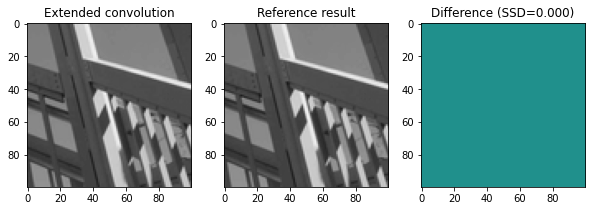

In [ ]:
kernel = np.random.rand(1, 1)
kernel = kernel / kernel.sum()  # normalise kernel
#kernel = np.array([-1,0,1])

filtered = extended_convolution(image_crop, kernel)
reference = scipy.ndimage.convolve(image_crop, kernel, mode='nearest')
#print(filtered)
#print(reference)
"""
print(filtered[2:len(filtered)-2,2:len(filtered)-2])
print(reference[2:len(reference)-2,2:len(reference)-2])
filtered = filtered[2:len(filtered)-2,0:len(filtered)-2]
reference = reference[2:len(reference)-2,0:len(reference)-2]
"""
ssd = np.sum(np.power(filtered - reference, 2))

plt.subplot(1, 3, 1); plt.title('Extended convolution');        plt.imshow(filtered,  cmap='gray', vmin=0,  vmax=1)
plt.subplot(1, 3, 2); plt.title('Reference result');            plt.imshow(reference, cmap='gray', vmin=0,  vmax=1)
plt.subplot(1, 3, 3); plt.title(f'Difference (SSD={ssd:.3f})'); plt.imshow(filtered - reference,   vmin=-1, vmax=1);

----
## 3. Image filtering [10 marks]

a) Design and demonstrate 3×3 convolution kernels for:
* computing horizontal, vertical and (any) diagonal image gradients, and
* sharpening an image using unsharp masking.

In [ ]:
## TASK: edit the gradient kernels:
hgrad = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])  # horizontal gradients
vgrad = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])  # vertical gradients
dgrad = np.array([[2, 1, 0], [1, 0, -1], [0, -1, -2]])  # diagonal gradients (any direction)

print("horizontal gradient kernel:"); print(hgrad); print()
print("vertical gradient kernel:");   print(vgrad); print()
print("diagonal gradient kernel:");   print(dgrad)

horizontal gradient kernel:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

vertical gradient kernel:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]

diagonal gradient kernel:
[[ 2  1  0]
 [ 1  0 -1]
 [ 0 -1 -2]]


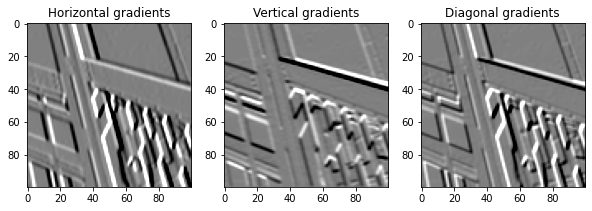

In [ ]:
## Perform convolutions with the gradient kernels
hgrad_result = scipy.ndimage.convolve(image_crop, hgrad, mode='nearest')
vgrad_result = scipy.ndimage.convolve(image_crop, vgrad, mode='nearest')
dgrad_result = scipy.ndimage.convolve(image_crop, dgrad, mode='nearest')

## Show results
plt.subplot(1, 3, 1); plt.title('Horizontal gradients'); plt.imshow(hgrad_result, cmap='gray', vmin=-1, vmax=1)
plt.subplot(1, 3, 2); plt.title('Vertical gradients');   plt.imshow(vgrad_result, cmap='gray', vmin=-1, vmax=1)
plt.subplot(1, 3, 3); plt.title('Diagonal gradients');   plt.imshow(dgrad_result, cmap='gray', vmin=-1, vmax=1);

Unsharp masking kernel:
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


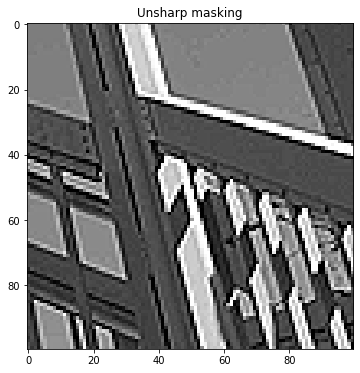

In [ ]:
## TASK: unsharp masking kernel
usm = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

print("Unsharp masking kernel:"); print(usm)
usm_result = scipy.ndimage.convolve(image_crop, usm, mode='nearest')
plt.title('Unsharp masking'); plt.imshow(usm_result, cmap='gray', vmin=0, vmax=1);

b) Compute the kernel for a 5×5 Gaussian blur with a standard deviation of 1 pixel.
Make sure that the kernel is normalised.

Gaussian 5x5 kernel:
[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]

Sum of elements: 1.0


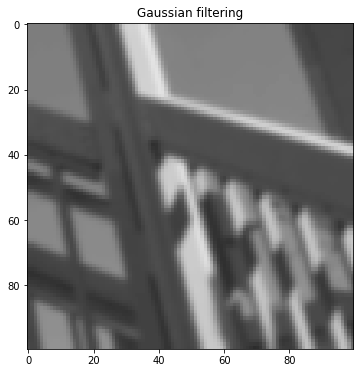

In [ ]:
## TASK: 5x5 Gaussian kernel with standard deviation of 1 pixel
gauss = np.zeros([5, 5])
for row in range(0,len(gauss)):
  x = row - 2
  for column in range(0,len(gauss[0])):
    y = column - 2
    gauss[row,column] = (1/(2*np.pi))*np.exp(-(x**2+y**2)/2)

gauss *= 1/gauss.sum()

print("Gaussian 5x5 kernel:"); print(gauss)
print(f"\nSum of elements: {gauss.sum()}")
gauss_result = scipy.ndimage.convolve(image_crop, gauss, mode='nearest')
plt.title('Gaussian filtering'); plt.imshow(gauss_result, cmap='gray', vmin=0, vmax=1);

----
## 4.	Exploiting the convolution theorem [30 marks]

Apply the convolution theorem to speed up the convolution.

You can use NumPy’s functions for 2D Fast Fourier Transform (FFT), `np.fft.fft2` and its inverse `np.fft.ifft2`.

In [ ]:
def fft_convolution(image, kernel):
  'Computes the convolution of an image with a kernel using FFT.'
  #convert image and kernel to fourier form then multiply together and invert result back to spacial form
  """
  flippedKernel = np.ones_like(kernel)
  for row in range(0,len(kernel)):
    for column in range(0,len(kernel[0])):
      flippedKernel[row, column] = kernel[len(kernel)-1-row][len(kernel[0])-1-column]
  kernel = flippedKernel
  """
  #paddedShape = (len(image)+len(kernel)-1, len(image[0])+len(kernel[0])-1)
  """
  if kernel.ndim == 1:
    kernelOffsetY = 0
    kernelOffsetX = len(kernel)//2
  else:
    """
  kernelOffsetY = len(kernel)//2
  #kernelOffsetX = int(np.ceil((len(kernel[0])+1)/2)-1)
  kernelOffsetX = len(kernel[0])//2
  #print(kernelOffsetY)
  #print(kernelOffsetX)
  image = np.pad(image,((kernelOffsetY,kernelOffsetY),(kernelOffsetX,kernelOffsetX)),"edge")
  #print(image)
  #print(len(kernel))
  #print(len(kernel[0]))
  """
  if kernel.ndim == 1:
    #kernel = np.pad(kernel,((0,len(image)-1),(0,len(image[0])-len(kernel))))
    kernel = np.pad(kernel,(0,len(kernel)))
    kernel = kernel.reshape(2,len(kernel)//2)
    kernel = np.pad(kernel,((0,len(image)-2),(0,len(image[0])-3)))
  """
  #else:
  kernel = np.pad(kernel,((0,len(image)-len(kernel)),(0,len(image[0])-len(kernel[0]))))
  """
  newKernel = np.zeros_like(image)
  newKernel[0,0] = kernel[0,0]
  newKernel[0,1] = kernel[0,1]
  newKernel[1,1] = kernel[0,1]
  newKernel[1,0] = kernel[1,0]
  newKernel[0,len(newKernel) - 1] = kernel[0,2]
  newKernel[1,len(newKernel) - 1] = kernel[1,2]
  newKernel[len(newKernel) - 1,0] = kernel[2,0]
  newKernel[len(newKernel) - 1,1] = kernel[2,1]
  newKernel[len(newKernel) - 1,len(newKernel) - 1] = kernel[2,2]
  kernel = newKernel
  """
  #print(kernel)
  uncroppedImage = np.fft.ifft2(np.fft.fft2(kernel)*np.fft.fft2(image)).astype(float)
  #print(uncroppedImage.shape)
  return uncroppedImage[kernelOffsetY*2:len(image),kernelOffsetX*2:len(image[0])]
  #return uncroppedImage
  #return np.ones_like(image)

### Test your result

A perfect result will match SciPy’s function `convolve` (with `mode='nearest'`) exactly, i.e. with a sum of squared differences (SSD) of 0 (zero):

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: ComplexWarning: Casting complex values to real discards the imaginary part


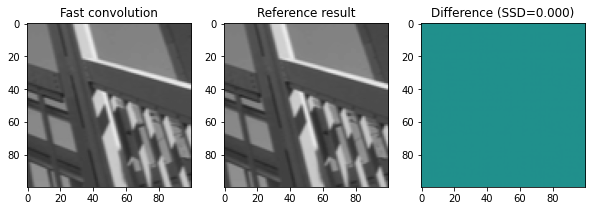

In [ ]:
#kernel = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
#kernel = kernel / kernel.sum()  # normalise kernel
kernel = np.random.rand(1, 3)
kernel = kernel / kernel.sum()
#kernel = np.array([-1,0,1])
#kernel = kernel / kernel.sum()

filtered = fft_convolution(image_crop, kernel)
reference = scipy.ndimage.convolve(image_crop, kernel, mode='nearest')
#print(reference)
ssd = np.sum(np.power(filtered - reference, 2))

plt.subplot(1, 3, 1); plt.title('Fast convolution');            plt.imshow(filtered,  cmap='gray', vmin=0,  vmax=1)
plt.subplot(1, 3, 2); plt.title('Reference result');            plt.imshow(reference, cmap='gray', vmin=0,  vmax=1)
plt.subplot(1, 3, 3); plt.title(f'Difference (SSD={ssd:.3f})'); plt.imshow(filtered - reference,   vmin=-1, vmax=1);

### Run-time comparison *(optional)*

You can use the following code to compare the run times of your FFT-based convolution function with “extended_convolution” above for different kernel sizes.
Please this code comment out when submitting your code, as it slows down the marking process.

In [ ]:
"""
import time

print('Kernel size  | Naive (crop) | FFT (crop) | FFT (full image)')
for kernel_size in range(1, 10):
  print(f"{kernel_size}-by-{kernel_size}".center(13), end='')
  kernel = np.ones([kernel_size, kernel_size]) / kernel_size ** 2

  tic = time.time()
  result = extended_convolution(image_crop, kernel)
  elapsed = time.time() - tic
  print(f"| {elapsed:12.3f} ", end='')
 
  tic = time.time()
  result = fft_convolution(image_crop, kernel)
  elapsed = time.time() - tic
  print(f"| {elapsed:10.3f} ", end='')
  
  tic = time.time()
  result = fft_convolution(image, kernel)
  elapsed = time.time() - tic
  print(f"| {elapsed:10.3f}")
"""

Kernel size  | Naive (crop) | FFT (crop) | FFT (full image)
    1-by-1   |        0.035 |      0.004 |      0.030
    2-by-2   |        0.072 |      0.002 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: ComplexWarning: Casting complex values to real discards the imaginary part


|      0.105
    3-by-3   |        0.135 |      0.003 |      0.144
    4-by-4   |        0.215 |      0.005 |      0.041
    5-by-5   |        0.313 |      0.002 |      0.054
    6-by-6   |        0.429 |      0.004 |      0.048
    7-by-7   |        0.590 |      0.003 |      0.041
    8-by-8   |        0.744 |      0.003 |      0.029
    9-by-9   |        0.935 |      0.002 |      0.028
